In [12]:
import sys
import os
import pathlib
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

CURR_DIR = pathlib.Path(os.path.abspath(''))

In [13]:
frame_speed_npy_path = CURR_DIR / 'Field_FS_DIST/frame_speed.npy'
frame_speed_avg_npy_path = CURR_DIR / 'Field_FS_DIST/frame_speed_avg.npy'

In [14]:
frame_speed = np.load(frame_speed_npy_path)
frame_speed_avg = np.load(frame_speed_avg_npy_path)

In [15]:
frame_speed_log = np.log(frame_speed)
frame_speed_avg_log = np.log(frame_speed_avg)

In [16]:
print(f"frame_speed_log: \nlen = {frame_speed_log.size}, min = {frame_speed_log.min()}, max = {frame_speed_log.max()}, mean = {frame_speed_log.mean()}, std = {frame_speed_log.std()}")

frame_speed_log: 
len = 67514889, min = 1.1920927533992653e-07, max = 29.490554809570312, mean = 3.9786813259124756, std = 2.861643075942993


# matplotlib

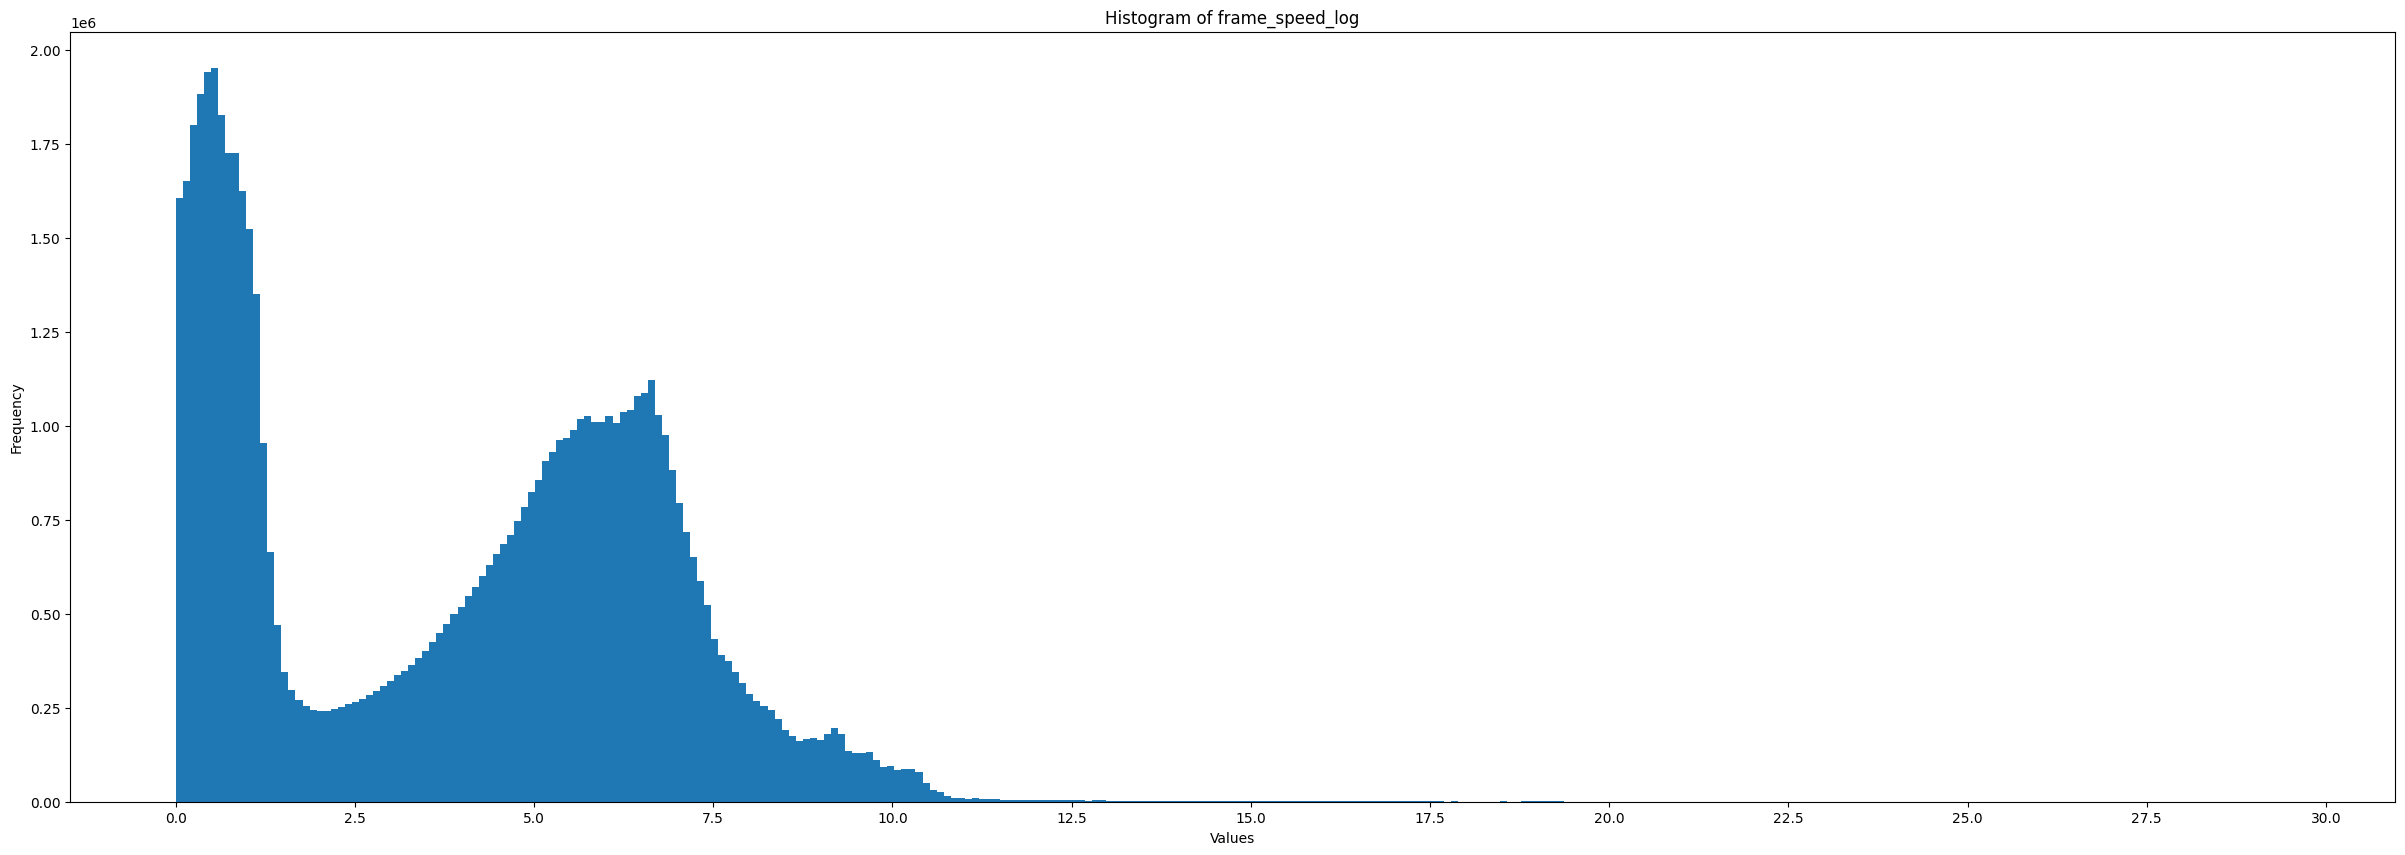

In [20]:
# Create a histogram plot using Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))
data = frame_speed_log
ax.hist(data, bins=300)
ax.set_title("Histogram of frame_speed_log")
ax.set_xlabel("Values")
ax.set_ylabel("Frequency")
tick_interval = 2.5
ax.set_xticks(np.arange(min(data), max(data) + tick_interval, tick_interval))
plt.show()

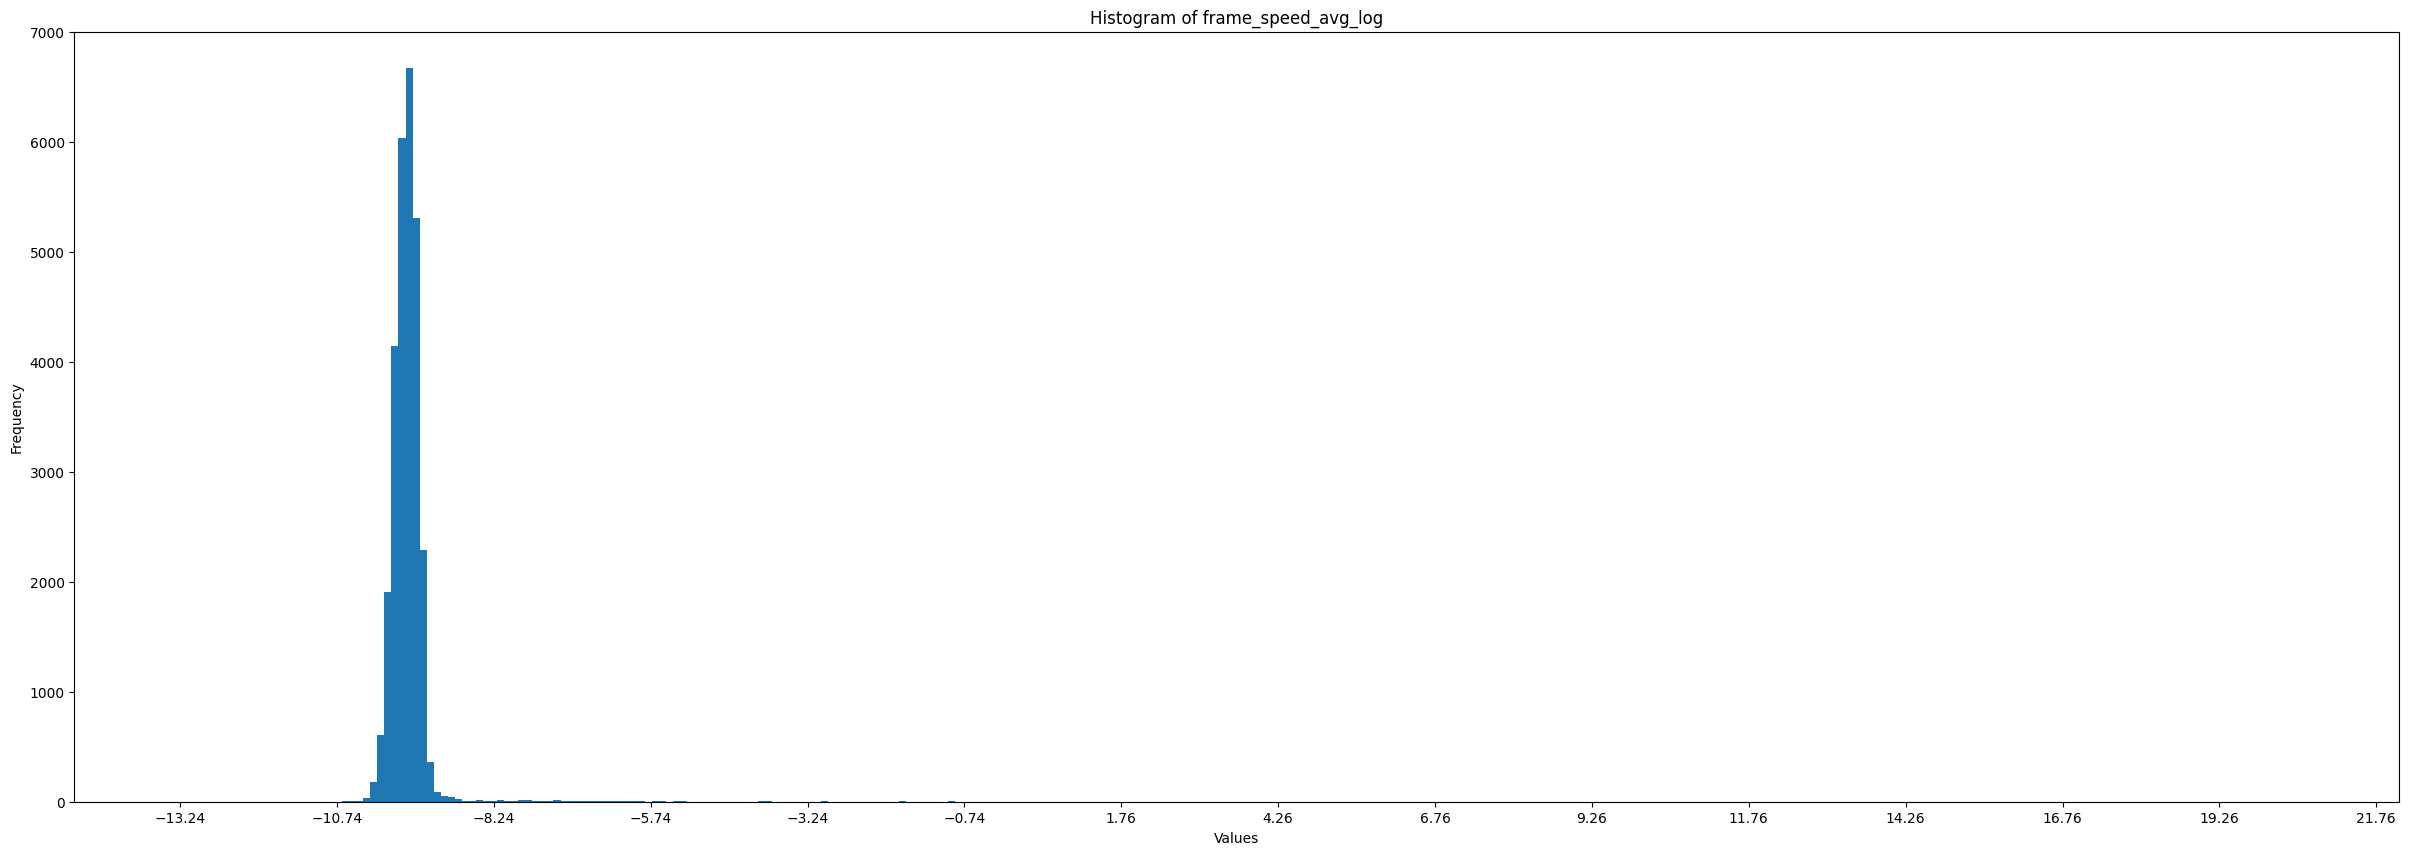

In [6]:
# Create a histogram plot using Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))
data = frame_speed_avg_log
ax.hist(data, bins=300)
ax.set_title("Histogram of frame_speed_avg_log")
ax.set_xlabel("Values")
ax.set_ylabel("Frequency")
tick_interval = 2.5
ax.set_xticks(np.arange(min(data), max(data) + tick_interval, tick_interval))
plt.show()

# draw in bokeh

### frame_speed_log

In [ ]:
%%time
import numpy as np
from scipy.stats import gaussian_kde
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, LassoSelectTool, WheelZoomTool, BoxSelectTool, BoxZoomTool, Toolbar, ResetTool, PanTool


x = frame_speed_log


tools = [
    HoverTool(),
    WheelZoomTool(),
    BoxZoomTool(),
    ResetTool(),
    PanTool(),
]

p = figure(width=1500, 
           height=450, 
           tools=tools,
           title="Distribution of frame_speed_log")

# Histogram
bins = np.linspace(0, 30, 300)
hist, edges = np.histogram(x, density=True, bins=bins)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
         fill_color="skyblue", line_color="white",
         legend_label="1000 random samples")

# # Probability density function
# x = np.linspace(0, 30, 300)
# pdf = np.exp(-0.5*x**2) / np.sqrt(2.0*np.pi)
# p.line(x, pdf, line_width=2, line_color="navy",
#        legend_label="Probability Density Function")

# Probability density function
kde = gaussian_kde(x)
pdf = kde(bins)
p.line(bins, pdf, line_width=2, color="red", legend_label="Probability Density Function")


p.y_range.start = 0
p.xaxis.axis_label = "x"
p.yaxis.axis_label = "PDF(x)"


show(p)

## get rid of too slow cluster

In [7]:
%%time
import numpy as np
from scipy.stats import gaussian_kde
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, LassoSelectTool, WheelZoomTool, BoxSelectTool, BoxZoomTool, Toolbar, ResetTool, PanTool


lower_bound = 2.05
frame_speed_log = frame_speed_log[frame_speed_log > lower_bound]


x = frame_speed_log


tools = [
    HoverTool(),
    WheelZoomTool(),
    BoxZoomTool(),
    ResetTool(),
    PanTool(),
]

p = figure(width=1500, 
           height=450, 
           tools=tools,
           title="Distribution of frame_speed_log, with lower bound")

# Histogram
bins = np.linspace(lower_bound, 30, 300)
hist, edges = np.histogram(x, density=True, bins=bins)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
         fill_color="skyblue", line_color="white",
         legend_label="1000 random samples")


# Probability density function
kde = gaussian_kde(x)
pdf = kde(bins)
p.line(bins, pdf, line_width=2, color="red", legend_label="Probability Density Function")


p.y_range.start = 0
p.xaxis.axis_label = "x"
p.yaxis.axis_label = "PDF(x)"


show(p)

## frame_speed_avg_log

In [11]:
%%time
import numpy as np
from scipy.stats import gaussian_kde
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, LassoSelectTool, WheelZoomTool, BoxSelectTool, BoxZoomTool, Toolbar, ResetTool, PanTool


x = frame_speed_avg_log


tools = [
    HoverTool(),
    WheelZoomTool(),
    BoxZoomTool(),
    ResetTool(),
    PanTool(),
]

p = figure(width=1500, 
           height=450, 
           tools=tools,
           title="Distribution of frame_speed_avg_log")

# Histogram
bins = np.linspace(0, 30, 300)
hist, edges = np.histogram(x, density=True, bins=bins)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
         fill_color="skyblue", line_color="white",
         legend_label="1000 random samples")

# # Probability density function
# x = np.linspace(0, 30, 300)
# pdf = np.exp(-0.5*x**2) / np.sqrt(2.0*np.pi)
# p.line(x, pdf, line_width=2, line_color="navy",
#        legend_label="Probability Density Function")

# Probability density function
kde = gaussian_kde(x)
pdf = kde(bins)
p.line(bins, pdf, line_width=2, color="red", legend_label="Probability Density Function")


p.y_range.start = 0
p.xaxis.axis_label = "x"
p.yaxis.axis_label = "PDF(x)"


show(p)

CPU times: user 267 ms, sys: 117 ms, total: 384 ms
Wall time: 718 ms


# draw in plotly

In [8]:
# %%time
# fig = px.histogram(frame_speed_log, nbins=300)
# fig.update_layout(
#     title="Histogram of Data",
#     xaxis_title="Values",
#     yaxis_title="Frequency",
# )
# fig.show()